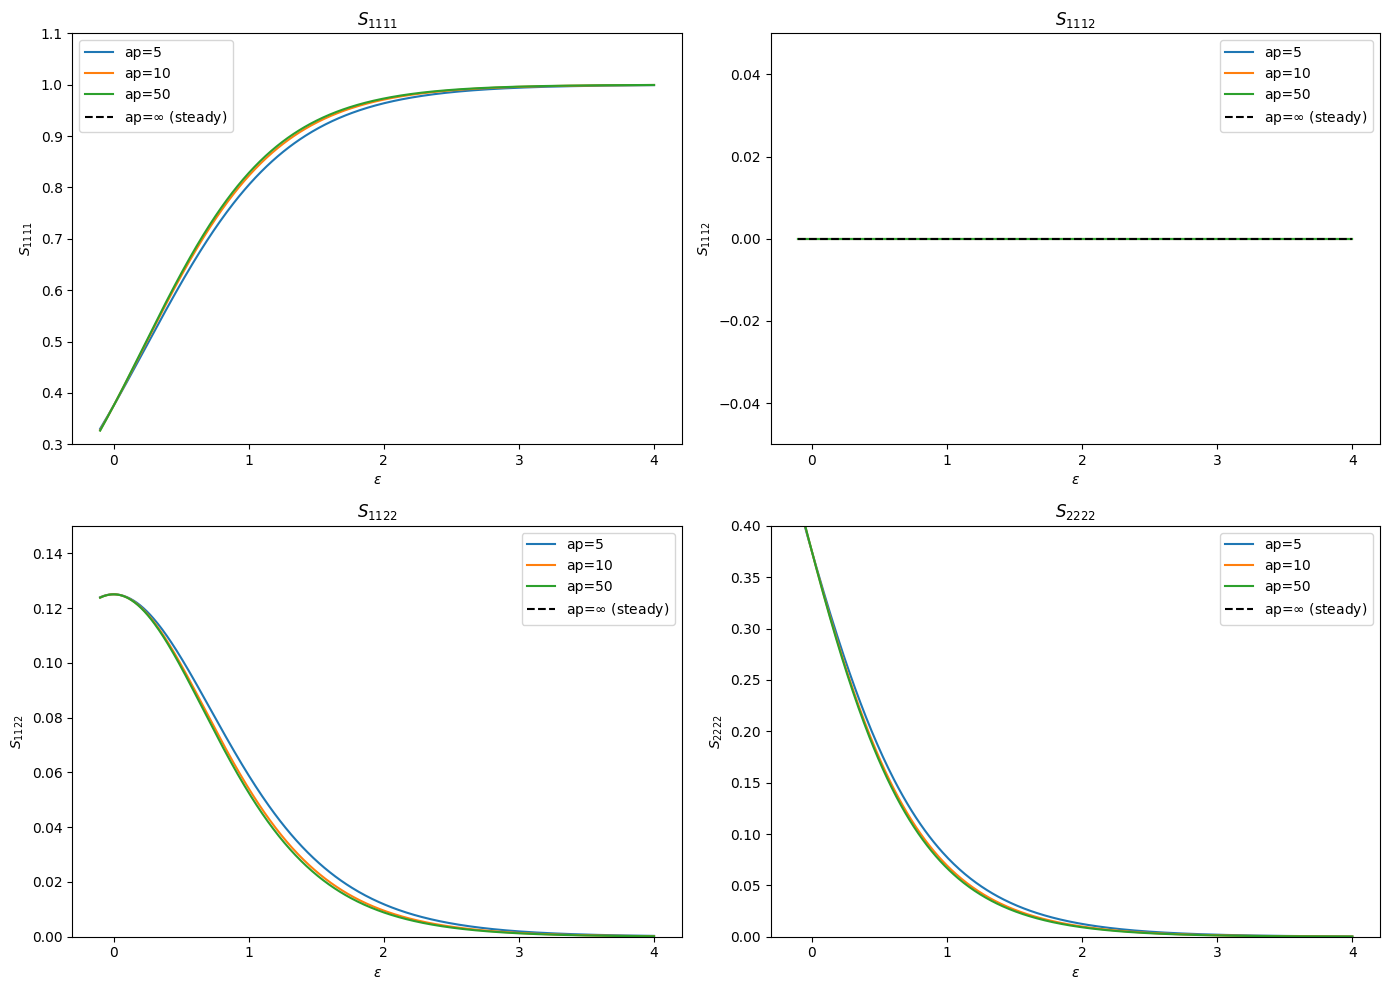

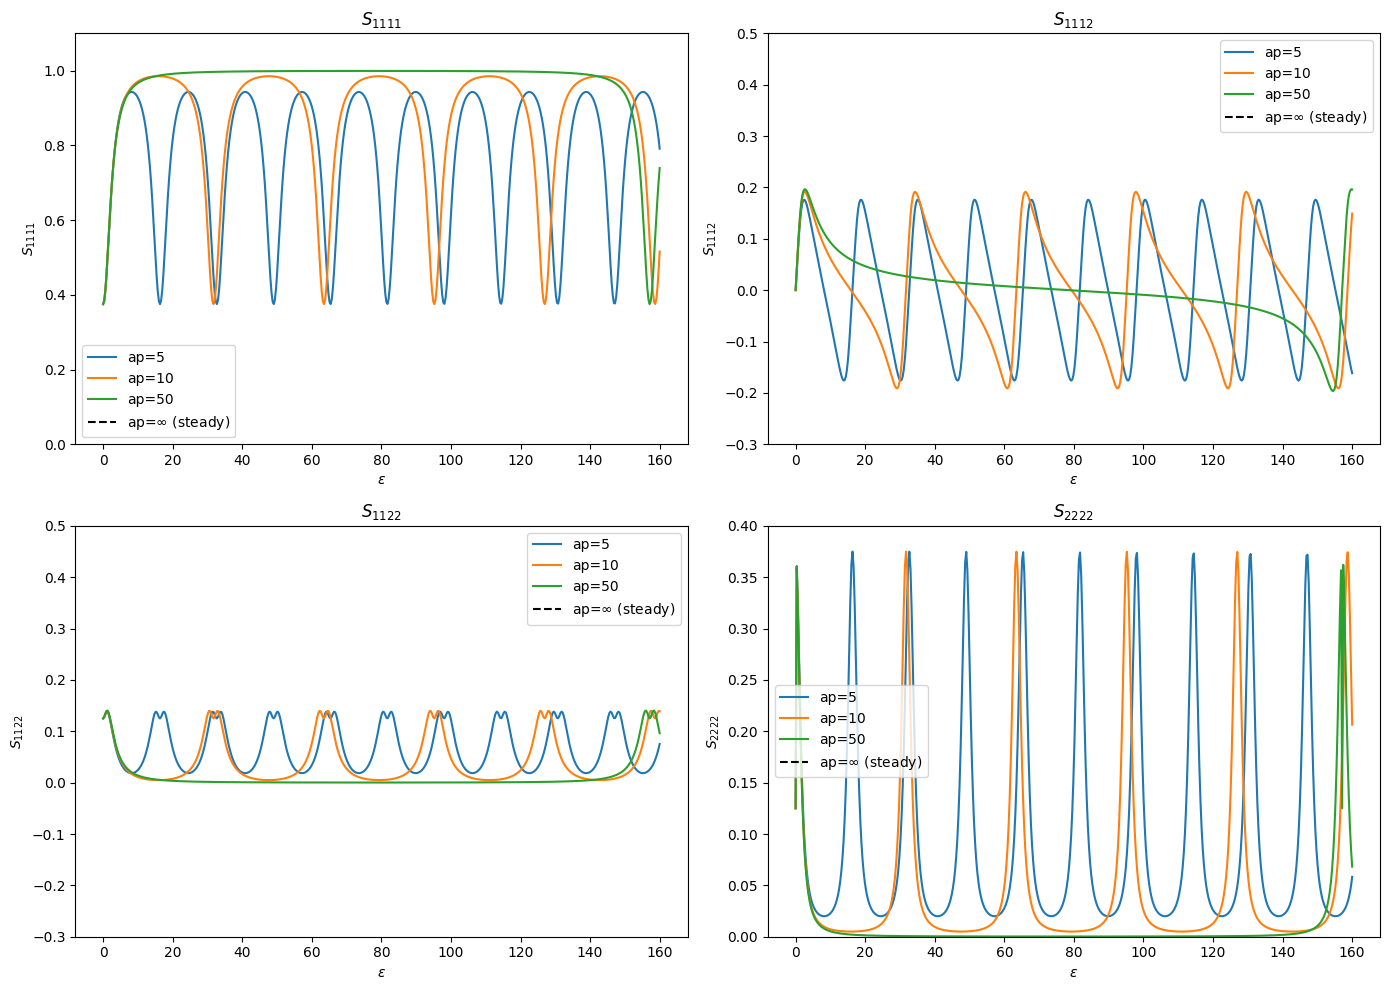

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# initial random orientation
S_1111_RANDOM = 0.375
S_1112_RANDOM = 0.0
S_1122_RANDOM = 0.125
S_2222_RANDOM = 0.125

EPSILON = 1e-10

def calculate_lambda(ap):
        return (ap**2 - 1) / (ap**2 + 1)

# elongational flow
def calculate_elongation_parameters(epsilon, ap):

    lam = calculate_lambda(ap)

    w = lam * epsilon

    a1 = np.exp(-2 * w)
    a2 = 0.0
    a3 = np.exp(2 * w)

    return a1, a2, a3

def get_elongtensor(epsilon, ap, component_calc_func, random_val, steady_val_inf_ap):

    if np.isclose(epsilon, 0.0):
        return random_val

    lam = calculate_lambda(ap)
    if np.isclose(lam, 1.0):
        return steady_val_inf_ap

    a1, a2, a3 = calculate_elongation_parameters(epsilon, ap)

    denominator = 2 * (a1 - a3)**2

    # zerodivision handling
    if np.isclose(denominator, 0.0, atol=EPSILON):
        return random_val

    return component_calc_func(a1, a2, a3, denominator)


def _calculate_S_1111_elongation(a1, a2, a3, denominator):

    numerator = a1 - 3 * a3 + 2 * a3**2
    return numerator / (denominator + EPSILON)

def _calculate_S_1112_elongation(a1, a2, a3, denominator):

    return 0.0

def _calculate_S_1122_elongation(a1, a2, a3, denominator):

    numerator = a1 - 2 * a1 * a3 + a3
    return numerator / (denominator + EPSILON)

def _calculate_S_2222_elongation(a1, a2, a3, denominator):

    numerator = 2 * a1**2 - 3 * a1 + a3
    return numerator / (denominator + EPSILON)


def S_1111_elongation(epsilon, ap):

    return get_elongtensor(epsilon, ap, _calculate_S_1111_elongation, S_1111_RANDOM, 1.0)

def S_1112_elongation(epsilon, ap):

    return get_elongtensor(epsilon, ap, _calculate_S_1112_elongation, S_1112_RANDOM, 0.0)

def S_1122_elongation(epsilon, ap):

    return get_elongtensor(epsilon, ap, _calculate_S_1122_elongation, S_1122_RANDOM, 0.0)

def S_2222_elongation(epsilon, ap):

    return get_elongtensor(epsilon, ap, _calculate_S_2222_elongation, S_2222_RANDOM, 0.0)

# shear flow
def calculate_shear_a_params(gamma, ap):

    lam = calculate_lambda(ap)

    if np.isclose(lam, 1.0):
        return 1.0, 0.0, 1.0


    wt_val = (gamma / 2) * np.sqrt(1 - lam**2)

    a1 = 1 - (2 * lam / (1 + lam)) * np.sin(wt_val)**2
    a2 = - (2 * lam / np.sqrt(1 - lam**2 + EPSILON)) * np.sin(2 * wt_val)
    a3 = 1 + (2 * lam / (1 - lam + EPSILON)) * np.sin(wt_val)**2

    return a1, a2, a3

def get_shear_tensor_component(gamma, ap, component_func, random_val, steady_val_inf_ap):

    if np.isclose(gamma, 0.0):
        return random_val

    lam = calculate_lambda(ap)
    if np.isclose(lam, 1.0):
        return steady_val_inf_ap

    a1, a2, a3 = calculate_shear_a_params(gamma, ap)


    denominator_common = (a1 + a3)**2 - 4


    wt_val_check = (gamma / 2) * np.sqrt(1 - lam**2)
    if np.isclose(np.sin(wt_val_check), 0.0, atol=1e-3) and not np.isclose(gamma, 0.0):
        return random_val


    if np.isclose(denominator_common, 0.0, atol=EPSILON):
        return random_val

    return component_func(a1, a2, a3, denominator_common)

def S_1111_shear_calc(a1, a2, a3, denominator_common):

    numerator_common = (a1 + a3 - 2)**2
    numerator = numerator_common * (4 + a1 + 5 * a3 + 2 * a3**2)
    denominator = 2 * (denominator_common)**2
    return numerator / (denominator + EPSILON)

def S_1112_shear_calc(a1, a2, a3, denominator_common):

    numerator_common = (a1 + a3 - 2)**2
    numerator = -numerator_common * a2 * (1 + a3)
    denominator = 2 * (denominator_common)**2
    return numerator / (denominator + EPSILON)

def S_1122_shear_calc(a1, a2, a3, denominator_common):

    numerator_common = (a1 + a3 - 2)**2
    numerator = numerator_common * (a1 + 2 * a1 * a3 + a3)
    denominator = 2 * (denominator_common)**2
    return numerator / (denominator + EPSILON)

def S_2222_shear_calc(a1, a2, a3, denominator_common):

    numerator_common = (a1 + a3 - 2)**2
    numerator = numerator_common * (4 + 2 * a1**2 + 5 * a1 + a3)
    denominator = 2 * (denominator_common)**2
    return numerator / (denominator + EPSILON)

#return calc
def S_1111_shear(gamma, ap):
    return get_shear_tensor_component(gamma, ap, S_1111_shear_calc, S_1111_RANDOM, 1.0)

def S_1112_shear(gamma, ap):
    return get_shear_tensor_component(gamma, ap, S_1112_shear_calc, S_1112_RANDOM, 0.0)

def S_1122_shear(gamma, ap):
    return get_shear_tensor_component(gamma, ap, S_1122_shear_calc, S_1122_RANDOM, 0.0)

def S_2222_shear(gamma, ap):
    return get_shear_tensor_component(gamma, ap, S_2222_shear_calc, S_2222_RANDOM, 0.0)


def plot_elongation_components():
    """
    Generates and displays plots of S_1111, S_1112, S_1122, S_2222 vs. Total Elongation for planar elongational flow.
    These plots match Figures 2a, 2b, 2c from the paper. [1]
    """
    epsilon_values = np.linspace(-0.1, 4.00, 500)
    aspect_ratios =  [5,10,50]
    tensor_components = {
        '$S_{1111}$': S_1111_elongation,
        '$S_{1112}$': S_1112_elongation,
        '$S_{1122}$': S_1122_elongation,
        '$S_{2222}$': S_2222_elongation
    }

    y_limits = {
        '$S_{1111}$': [0.3, 1.1],
        '$S_{1112}$': [-0.05, 0.05],
        '$S_{1122}$': [0, 0.15],
        '$S_{2222}$': [0, 0.4]
    }

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (title, func) in enumerate(tensor_components.items()):
        ax = axes[i]
        for ap in aspect_ratios:
            s_data = [func(e, ap) for e in epsilon_values]
            ax.plot(epsilon_values, s_data, label=f'ap={ap}')

        s_inf_ap_data = [func(e, np.inf) for e in epsilon_values]
        ax.plot(epsilon_values, s_inf_ap_data, 'k--', label='ap=$\infty$ (steady)')

        ax.set_title(f'{title}')
        ax.set_xlabel('$\epsilon$')
        ax.set_ylabel(f'{title}')


        ax.set_ylim(y_limits[title])
        ax.legend()


    plt.tight_layout()
    plt.show()


def plot_shear_components():


    gamma_values = np.linspace(0, 160, 500)
    aspect_ratios = [5, 10, 50]

    tensor_components = {
        '$S_{1111}$': S_1111_shear,
        '$S_{1112}$': S_1112_shear,
        '$S_{1122}$': S_1122_shear,
        '$S_{2222}$': S_2222_shear
    }

    initial_random_values = {
        '$S_{1111}$': S_1111_RANDOM,
        '$S_{1112}$': S_1112_RANDOM,
        '$S_{1122}$': S_1122_RANDOM,
        '$S_{2222}$': S_2222_RANDOM
    }

    y_limits = {

        '$S_{1111}$': [0, 1.1],
        '$S_{1112}$': [-0.3, 0.50],
        '$S_{1122}$': [-0.3, 0.50],
        '$S_{2222}$': [0, 0.4]
    }

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (title, func) in enumerate(tensor_components.items()):
        ax = axes[i]
        for ap in aspect_ratios:
            s_data = [func(e, ap) for e in gamma_values]
            ax.plot(gamma_values, s_data, label=f'ap={ap}')


        s_inf_ap_data = [func(e, np.inf) for e in gamma_values]
        ax.plot(gamma_values, s_inf_ap_data, 'k--', label='ap=$\infty$ (steady)')

        ax.set_title(f'{title}')
        ax.set_xlabel('$\epsilon$')
        ax.set_ylabel(f'{title}')


        ax.set_ylim(y_limits[title])
        ax.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_elongation_components()
    plot_shear_components()


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def quadratic_closure(A2):
    """
    Quadratic closure approximation for A4 in terms of A2.
    A4_{ijkl} ≈ (A2_{ij} A2_{kl} + A2_{ik} A2_{jl} + A2_{il} A2_{jk}) / 7
    """
    A4 = np.zeros((3,3,3,3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    A4[i,j,k,l] = (
                        A2[i,j]*A2[k,l] +
                        A2[i,k]*A2[j,l] +
                        A2[i,l]*A2[j,k]
                    ) / 7.0
    return A4

def double_contract(D, A4):
    """
    Perform double contraction of second-order tensor D and fourth-order tensor A4:
    Result_{ij} = D_{kl} * A4_{ijkl}
    """
    result = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            s = 0.0
            for k in range(3):
                for l in range(3):
                    s += D[k,l] * A4[i,j,k,l]
            result[i,j] = s
    return result

def dA2_dt(t, A2_flat, W, D, lam):
    """
    Compute dA2/dt at time t.
    A2_flat: flattened 3x3 matrix (vector length 9)
    """
    A2 = A2_flat.reshape((3,3))
    A4 = quadratic_closure(A2)

    term1 = W @ A2 - A2 @ W
    term2 = D @ A2 + A2 @ D
    term3 = double_contract(D, A4)

    dA2 = term1 + lam * (term2 - 2 * term3)

    # Enforce symmetry (A2 should remain symmetric)
    dA2 = 0.5 * (dA2 + dA2.T)

    return dA2.flatten()

# Parameters and initial conditions

# Aspect ratio r (ellipsoidal particle)
r = 10.0
lam = (r**2 - 1) / (r**2 + 1)

# Example simple shear flow rate tensors
gamma_dot = 1.0  # shear rate

D = np.array([[0, gamma_dot/2, 0],
              [gamma_dot/2, 0, 0],
              [0, 0, 0]])

W = np.array([[0, -gamma_dot/2, 0],
              [gamma_dot/2, 0, 0],
              [0, 0, 0]])

# Initial orientation tensor (isotropic distribution)
A2_0 = np.eye(3) / 3

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve ODE
sol = solve_ivp(dA2_dt, t_span, A2_0.flatten(), args=(W, D, lam), t_eval=t_eval, method='RK45')

# Extract results
A2_t = sol.y.T.reshape(-1, 3, 3)

# Example: print final orientation tensor
print("Final A2:")
print(A2_t[-1])


Final A2:
[[0.01166794 0.14284042 0.        ]
 [0.14284042 2.15711539 0.        ]
 [0.         0.         0.15408053]]
